<a href="https://colab.research.google.com/github/Kushashu-1/DeepLearning_Project/blob/main/wimbledon_matches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#### Topic :Sports Analysis 
#### Subtopic : Wimbledon match Winner Prediction
#### Name : Ashutosh Singh Kushwaha

In [ ]:
#from create_features_utils import *
import pandas as pd
import numpy as np
from keras import models, layers
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras import metrics
from keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/wimbledon_matches_with_feature.csv')

df = df.dropna()

df['diff_rank'] = df['player_0_rank'] - df['player_1_rank']

In [ ]:
df.head()

,Tournament,Date,Surface,Round,player_0,player_0_rank,player_0_odd,player_1,player_1_rank,player_1_odd,...,diff_close_sets_percent_52,diff_match_win_percent_grass_60,diff_games_win_percent_grass_60,diff_5_set_match_win_percent_grass_60,diff_close_sets_percent_grass_60,diff_match_win_percent_hh,diff_games_win_percent_hh,diff_match_win_percent_grass_hh,diff_games_win_percent_grass_hh,diff_rank
0,Wimbledon,2010/06/21,Grass,1st Round,Ljubicic I.,15.0,1.12,Przysiezny M.,94.0,5.50,...,0.477584,0.600000,0.090909,0.000000,0.200000,0.0,0.0,0.0,0.0,-79.0
1,Wimbledon,2010/06/21,Grass,1st Round,Lopez F.,30.0,1.16,Levine J.,115.0,4.50,...,0.070369,0.000000,-0.006238,-0.666667,0.005128,0.0,0.0,0.0,0.0,-85.0
2,Wimbledon,2010/06/21,Grass,1st Round,Zeballos H.,44.0,2.00,Lu Y.H.,82.0,1.72,...,0.143198,0.047619,0.039829,0.000000,0.053140,0.0,0.0,0.0,0.0,-38.0
3,Wimbledon,2010/06/21,Grass,1st Round,Andreev I.,57.0,3.00,Brands D.,98.0,1.36,...,0.020328,0.100000,-0.035750,0.750000,-0.188406,0.0,0.0,0.0,0.0,-41.0
4,Wimbledon,2010/06/21,Grass,1st Round,Ball C.,134.0,2.25,Berankis R.,156.0,1.57,...,-0.210145,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,-22.0


In [ ]:
features_list = [
 'diff_rank',
 'diff_match_win_percent',
 'diff_games_win_percent',
 'diff_5_set_match_win_percent',
 'diff_close_sets_percent',
 'diff_match_win_percent_grass',
 'diff_games_win_percent_grass',
 'diff_5_set_match_win_percent_grass',
 'diff_close_sets_percent_grass',
 'diff_match_win_percent_52',
 'diff_games_win_percent_52',
 'diff_5_set_match_win_percent_52',
 'diff_close_sets_percent_52',
 'diff_match_win_percent_grass_60',
 'diff_games_win_percent_grass_60',
 'diff_5_set_match_win_percent_grass_60',
 'diff_close_sets_percent_grass_60',
 'diff_match_win_percent_hh',
 'diff_games_win_percent_hh',
 'diff_match_win_percent_grass_hh',
 'diff_games_win_percent_grass_hh']

In [ ]:
## Features Available 
df.columns

Index(['Tournament', 'Date', 'Surface', 'Round', 'player_0', 'player_0_rank',
       'player_0_odd', 'player_1', 'player_1_rank', 'player_1_odd', 'outcome',
       'player_0_match_win_percent', 'player_1_match_win_percent',
       'player_0_games_win_percent', 'player_1_games_win_percent',
       'player_0_5_set_match_win_percent', 'player_1_5_set_match_win_percent',
       'player_0_close_sets_percent', 'player_1_close_sets_percent',
       'player_0_match_win_percent_grass', 'player_1_match_win_percent_grass',
       'player_0_games_win_percent_grass', 'player_1_games_win_percent_grass',
       'player_0_5_set_match_win_percent_grass',
       'player_1_5_set_match_win_percent_grass',
       'player_0_close_sets_percent_grass',
       'player_1_close_sets_percent_grass', 'player_0_match_win_percent_52',
       'player_1_match_win_percent_52', 'player_0_games_win_percent_52',
       'player_1_games_win_percent_52', 'player_0_5_set_match_win_percent_52',
       'player_1_5_set_match_win

In [ ]:
target = df.outcome
features = df[features_list]

train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.20, random_state=1)

In [ ]:
network = models.Sequential()
network.add(layers.Dense(units=64, activation='relu', input_shape=(len(features.columns),)))
network.add(layers.Dense(units=32, activation='relu'))
network.add(layers.Dense(units=1, activation='sigmoid'))

network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=500)
mc = ModelCheckpoint('data/best_model.h5', monitor='val_loss', mode='min', verbose=2, save_best_only=True)

history = network.fit(train_features, train_target, 
            epochs=1000, verbose=0, batch_size=128, 
            validation_data=(test_features, test_target), callbacks=[es, mc]) 

saved_model = load_model('data/best_model.h5')


Epoch 1: val_loss improved from inf to 4.65959, saving model to data/best_model.h5

Epoch 2: val_loss improved from 4.65959 to 0.96699, saving model to data/best_model.h5

Epoch 3: val_loss did not improve from 0.96699

Epoch 4: val_loss did not improve from 0.96699

Epoch 5: val_loss improved from 0.96699 to 0.58912, saving model to data/best_model.h5

Epoch 6: val_loss improved from 0.58912 to 0.56924, saving model to data/best_model.h5

Epoch 7: val_loss did not improve from 0.56924

Epoch 8: val_loss did not improve from 0.56924

Epoch 9: val_loss did not improve from 0.56924

Epoch 10: val_loss improved from 0.56924 to 0.56030, saving model to data/best_model.h5

Epoch 11: val_loss improved from 0.56030 to 0.55813, saving model to data/best_model.h5

Epoch 12: val_loss did not improve from 0.55813

Epoch 13: val_loss improved from 0.55813 to 0.55169, saving model to data/best_model.h5

Epoch 14: val_loss improved from 0.55169 to 0.54993, saving model to data/best_model.h5

Epoch 

In [ ]:
_, train_acc = saved_model.evaluate(train_features, train_target, verbose=0)
_, test_acc = saved_model.evaluate(test_features, test_target, verbose=0)

print('Train Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

Train Accuracy: 0.760, Test Accuracy: 0.759


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<ipython-input-13-40701fc40d36>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


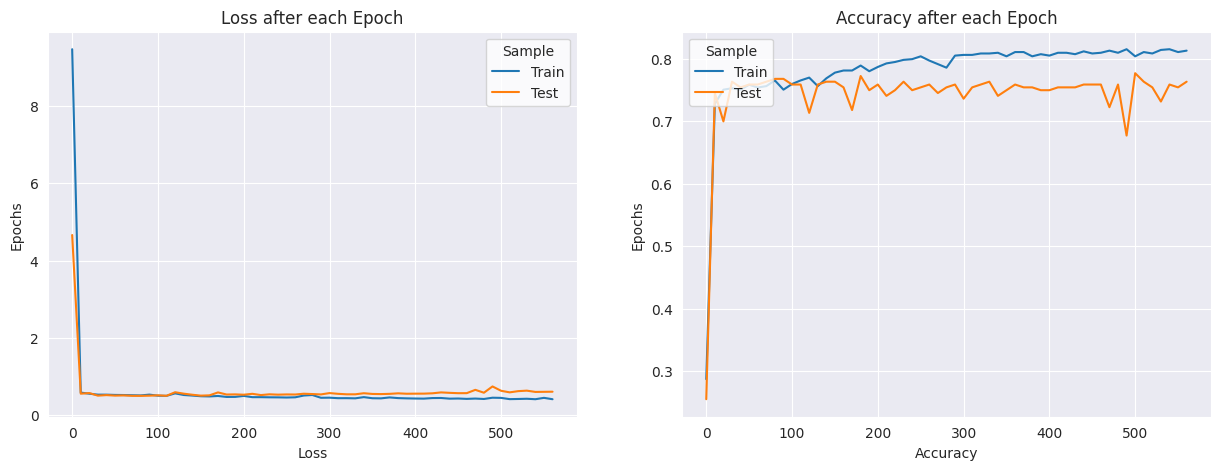

In [ ]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('Loss after each Epoch')
plt.plot(history.epoch[::10], history.history['loss'][::10], label='Train')
plt.plot(history.epoch[::10], history.history['val_loss'][::10], label='Test')
plt.legend(['Train', 'Test'],loc='upper right', title='Sample', facecolor='white',fancybox=True)
plt.xlabel('Loss')
plt.ylabel('Epochs')

plt.subplot(1, 2, 2)
plt.title('Accuracy after each Epoch')
plt.plot(history.epoch[::10], history.history['accuracy'][::10], label='Train')
plt.plot(history.epoch[::10], history.history['val_accuracy'][::10], label='Test')
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left', title='Sample', facecolor='white', fancybox=True)


plt.savefig('loss_acc.jpg')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = (saved_model.predict(test_features) > 0.5).astype("int32")
print(classification_report(test_target,predictions))
print(confusion_matrix(test_target, predictions))

7/7 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       165
           1       0.54      0.24      0.33        55

    accuracy                           0.76       220
   macro avg       0.66      0.58      0.59       220
weighted avg       0.72      0.76      0.72       220

[[154  11]
 [ 42  13]]


In [ ]:
predictions = (saved_model.predict(train_features) > 0.5).astype("int32")
print(classification_report(train_target,predictions ))
print(confusion_matrix(train_target, predictions ))

28/28 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.76      0.96      0.85       627
           1       0.72      0.27      0.39       252

    accuracy                           0.76       879
   macro avg       0.74      0.61      0.62       879
weighted avg       0.75      0.76      0.72       879

[[601  26]
 [185  67]]
